<a href="https://colab.research.google.com/github/pathilink/MBA_USP-Esalq_TCC/blob/main/notebook/findex_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering: extracting patterns from data

## Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler # standardizing features
from scipy.cluster.hierarchy import dendrogram, linkage # hierarchical clustering

from sklearn.preprocessing import Normalizer # normalize data
from sklearn.cluster import KMeans # knn
from sklearn import metrics # validation

from sklearn.decomposition import PCA



## Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read file
df = pd.read_csv('/content/drive/My Drive/TCC/data/micro_bra_prepared.csv')
df.head(10)

,wgt,female,age,educ,inc_q,emp_in,account,account_fin,account_mob,fin1_1a,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
0,0,2,26,2,3,1,1,1,1,1,...,1,4,4,4,1,1,1,1,1,1
1,0,2,25,3,5,1,1,1,0,1,...,1,3,4,4,4,5,1,1,1,1
2,5,1,52,1,1,2,1,1,0,-1,...,4,1,4,4,2,5,1,2,1,0
3,0,2,23,2,3,1,1,1,0,-1,...,3,1,4,4,4,4,1,1,1,0
4,1,2,15,2,5,2,1,1,0,2,...,4,4,4,4,4,5,1,1,1,1
5,0,1,23,2,3,1,1,1,1,2,...,1,4,4,4,1,5,1,1,1,1
6,1,1,48,1,2,1,1,1,0,-1,...,2,1,4,4,2,4,1,2,1,0
7,0,1,39,2,4,1,1,1,1,1,...,1,1,4,4,1,1,1,1,1,1
8,0,2,44,2,5,1,1,1,1,1,...,1,4,4,4,1,5,1,1,1,1
9,0,1,56,3,5,1,1,1,0,2,...,1,4,4,4,1,5,1,1,1,1


In [4]:
# select female only and drop col
df = df.query('female == 1').drop('female', axis=1)
df.head()

,wgt,age,educ,inc_q,emp_in,account,account_fin,account_mob,fin1_1a,fin1_1b,...,receive_wages,receive_transfers,receive_pension,receive_agriculture,pay_utilities,remittances,mobileowner,internetaccess,anydigpayment,merchantpay_dig
2,5,52,1,1,2,1,1,0,-1,-1,...,4,1,4,4,2,5,1,2,1,0
5,0,23,2,3,1,1,1,1,2,2,...,1,4,4,4,1,5,1,1,1,1
6,1,48,1,2,1,1,1,0,-1,-1,...,2,1,4,4,2,4,1,2,1,0
7,0,39,2,4,1,1,1,1,1,2,...,1,1,4,4,1,1,1,1,1,1
9,0,56,3,5,1,1,1,0,2,2,...,1,4,4,4,1,5,1,1,1,1


In [5]:
print('The dataframe has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

The dataframe has 475 rows and 71 columns.


## Modeling

### Pre-processing

In [6]:
# Standardizing data, so that all features have equal weight. This is important for modelling.
# Otherwise, one feature would be considered much more important than other one, and would introduce bias.
# scaler = StandardScaler()
# df_std = scaler.fit_transform(df)
# df_std

In [7]:
# pre-processing: normalize data between 0 and 1
# if the data is not in the same range, the clustering algorithm will not give good results
values = Normalizer().fit_transform(df.values)  # <-- better results than StandardScaler()
values


array([[0.09143962, 0.95097204, 0.01828792, ..., 0.03657585, 0.01828792,
        0.        ],
       [0.        , 0.82406052, 0.07165744, ..., 0.03582872, 0.03582872,
        0.03582872],
       [0.01996808, 0.95846768, 0.01996808, ..., 0.03993615, 0.01996808,
        0.        ],
       ...,
       [0.        , 0.961748  , 0.04579752, ..., 0.01526584, 0.01526584,
        0.01526584],
       [0.        , 0.74838327, 0.08804509, ..., 0.04402255, 0.04402255,
        0.04402255],
       [0.        , 0.82269007, 0.08226901, ..., 0.0411345 , 0.0411345 ,
        0.0411345 ]])

### Hierarchical Clustering

In [8]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix.
hier_clust = linkage(values, method = 'ward')

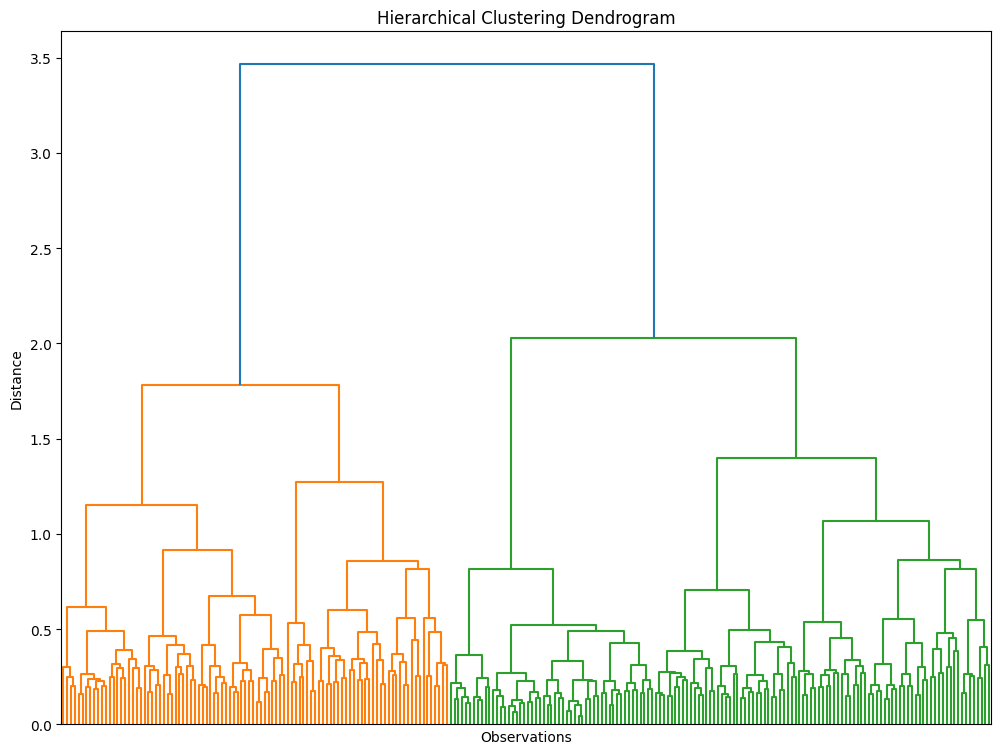

In [9]:
# We plot the results from the Hierarchical Clustering using a Dendrogram.
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 8,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

### K-Nearest Neighbors

In [10]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus.
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(values)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

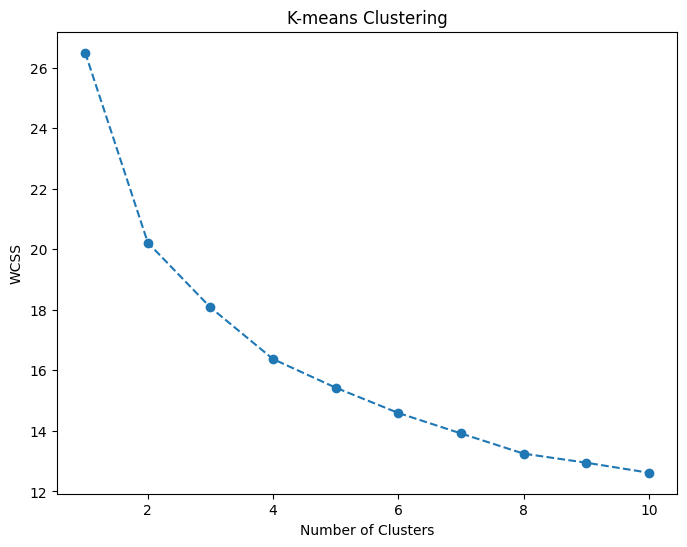

In [11]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters.
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [12]:
# the data was not partitioned between training and test because there is no target variable

kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# clusters
labels = kmeans.labels_

In [28]:
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

### Validation

Existing validation metrics are divided into two categories: external and internal metrics.

**External metrics** need labels to perform calculations and generate validation. As there are no labels, they will not be used in this project. Internal metrics, on the other hand, are independent of labels, although they have a more complex structure.

**Internal metrics** are based on two validation criteria. The first is **compactness**, which tells us how close the points are in the same cluster - the closer the points, the more compact it is.

The second validation criterion is **separation**, which indicates how well separated the points in different clusters are. The idea is exactly the opposite of compactness: the further apart the clusters are from each other, the better. This means that they are more diverse.

<br>

**Silhouette coefficient** (compactness)

$$s = \frac{\beta - \alpha}{max(\alpha, \beta)}$$

* $\alpha$ is the average distance between the point and all the other points in the _same_ cluster.

* $\beta$ is the average distance between the point and all the other points in the _nearest_ cluster.

* Use the Euclidean distance.

* <font color='RoyalBlue'>The result is always between -1 and 1. When the silhouette value is positive and closer to 1, the better, the more separated the clusters are.</font>

<br>

**Davies-Bouldin index** (separation)

$$DB = \frac{1}{k}\sum_{i=1}^{k}max{_i}{_\ne}{_j}R{_i}{_j}$$

* "R" takes another formula to calculate, and basically gives us a measure of similarity between two clusters, "i" and "j".

* $R{_i}{_j} = \frac{{s}{_i} + {s}{_j}} {{d}{_i}{_j}}$

* Use the Euclidean distance.

* <font color='RoyalBlue'>The closer to zero, the better.</font>


<br>

**Euclidean distance**

$$d(A, B) = \sqrt{(x_B - x_A)² + (y_B - y_A)²}$$

<br>

**Calinski-Harabasz index** (compactness & separation)

$$s = \frac{tr(B_k)}{tr(W_k)} \times \frac{n_E - k}{k - 1}$$

* $n_E$: the number of elements in the cluster

* $k$: number of clusters

* $B_k = \sum_{q=1}^{k}n_q(c_q - c_E)(c_q - c_E)^T$

  * $B_k$: dispersion of elements between clusters
  * k: number of clusters
  * q: cluster
  * nq: number of elements in the cluster
  * cq: cluster centroid
  * ce: centroid of elements

* $W_k = \sum_{q=1}^{k}\sum_{x \in C_q}(x - c_q)(x - c_q)^T$

  * $W_k$: dispersion of elements within clusters
  * k: number of clusters
  * q: cluster

* It takes into account the dispersion of the points within a cluster, both in the points within a specific cluster and between different clusters, also considering compactness and separation.

* <font color='RoyalBlue'>It's best if the value is as high as possible.</font>

In [13]:
# Silhouette coefficient
# result > 0 indicates that the cluster is good according to this metric.
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
silhouette

0.2937975673991737

In [14]:
# Davies-Bouldin index
# closer to zero better.
dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.7066363055740947

In [15]:
# Calinski-Harabasz index
# as high as possible
calinski = metrics.calinski_harabasz_score(values, labels)
calinski

146.80061136408716

#### Relative assessment

The value of the metrics is compared based on different configurations of the algorithm. The idea is to adjust the algorithm's parameters to obtain the best results.

In this case, the number of clusters will be changed, as this is the parameter that has the most impact.

<font color='RoyalBlue'>You choose one of the configurations to move on and carry out other validations.</fonte>

In [16]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [17]:
# configuration chosen, because we get a good result on the silhouette index, which is quite popular, so it's interesting to use it as the main metric
s1, dbs1, calinski1 = clustering_algorithm(2, values)
s1, dbs1, calinski1

(0.2937975673991737, 1.7066363055740947, 146.80061136408716)

In [18]:
s2, dbs2, calinski2 = clustering_algorithm(4, values)
s2, dbs2, calinski2

(0.16501349267815033, 1.7951737524395766, 97.00988185327597)

In [19]:
s3, dbs3, calinski3 = clustering_algorithm(7, values)
s3, dbs3, calinski3

(0.14050833295651918, 1.8854393232959512, 71.0092914154741)

In [20]:
s4, dbs4, calinski4 = clustering_algorithm(8, values)
s4, dbs4, calinski4

(0.14524412642433407, 1.8400986818934344, 66.71778904385924)

#### Cluster structure

Another form of validation is to compare the values we get from our dataset with others from a random database. <font color='RoyalBlue'>The idea is that we can ensure that our dataset has better metrics, and therefore a structure that can be clustered.</font>

There is a big difference between the original database and the random set, which is good for validation.

For the random set the silhoutte value was approximately 0.01 and for the original database 0.29. This shows that having a positive value is not always enough.

In [21]:
random_data = np.random.rand(475,71) # same n rows and cols
s, dbs, calinski = clustering_algorithm(2, random_data)
print(s, dbs, calinski)
print(s1,dbs1, calinski1)

0.016051500664340614 7.335277847555095 8.707831463566512
0.2937975673991737 1.7066363055740947 146.80061136408716


#### Cluster stability

The database is divided and KMeans is run for each of these divisions in order to obtain similar results for the metrics, so KMeans must behave similarly in each division in order to achieve validation.

<font color='RoyalBlue'>If the values in the three columns are similar and the metrics are different, this indicates that the cluster is valid.</font>

In [22]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(2, set1)
s2, dbs2, calinski2 = clustering_algorithm(2, set2)
s3, dbs3, calinski3 = clustering_algorithm(2, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.32323782879794605 1.592904681071386 56.996732809221726
0.2433961751933838 1.8176269857235374 42.7601242900177
0.29825620341460973 1.6382846465451273 52.09059108581247


## Analyzing the values

<font color='RoyalBlue'>Strategy for selecting the most significant attribute and analyzing it:</font>

We have the value of each of the 16 attributes of the 5 clusters. We will observe the variance of the centroids for a given attribute, i.e. we will collect an attribute and check how it behaves in the different clusters.

For example, if we take the first cluster with a value of 1.60024706e-01 for the first "BALANCE" attribute.

The next cluster will already be very different, and the same goes for the following ones.

Since we're going to analyze variance, we'll look for an attribute where the values are different between the clusters, so that we have a better chance of observing the particularities of each group.

For example, we can see that we have customers who spend a lot in one cluster and those who spend little in another. However, there may be some other attribute where the difference isn't significant and won't help or even hinder our interpretation.

So we'll use the variance calculation. <font color='RoyalBlue'>Those attributes with the greatest variance will be used.</font>

In [23]:
# selects the KMeans centroids of each of the clusters
centroids = kmeans.cluster_centers_
centroids

array([[ 1.30954246e-02,  9.47010022e-01,  4.28281943e-02,
         6.24604013e-02,  2.52511927e-02,  1.72701279e-02,
         1.71474138e-02,  4.92299795e-03,  1.22877662e-02,
         1.84487441e-02,  2.70267206e-02,  1.08945048e-02,
        -3.50098305e-05,  1.67981203e-02,  1.59540954e-02,
         1.69696367e-02, -2.10068445e-03, -3.47516915e-03,
        -6.32252817e-04,  1.37037553e-02,  9.76244619e-03,
         1.34883362e-02,  7.40149315e-03,  1.97844294e-02,
         3.62289451e-02,  8.52484779e-03,  3.14748695e-02,
         3.41375737e-02,  3.33016578e-02, -4.79492674e-03,
        -5.97565671e-04,  3.65570059e-02,  3.59415517e-02,
         3.93512455e-02,  3.64367650e-02,  3.66241526e-02,
         3.52167355e-02,  6.70324085e-02,  2.82075026e-02,
         2.53100341e-02,  3.50567087e-02,  3.65835950e-02,
         2.51371251e-02,  1.52677513e-02,  1.78829969e-02,
         6.15932802e-03,  3.34418340e-02, -2.38836937e-03,
        -5.08506742e-03, -1.19763970e-03,  3.43009844e-0

## Selecting variables

We will select the variables with the highest variance, i.e. those with a significant difference between the clusters. The most relevant ones will be used for the detailed analysis of the clusters.

In [ ]:
# variance of each variable
# max = len(centroids[0])
# for i in range(max):
#     print(df.columns.values[i],"{:.5f}".format(centroids[:, i].var()))  # "\n{:.4f}"

In [24]:
max = len(centroids[0])

col_list = []
var_list = []

for i in range(max):
    col_list.append(df.columns.values[i])
    var_list.append(round(centroids[:, i].var(), 4))

# df variance
df_var = pd.DataFrame(
    {
        'variable': col_list,
        'variance': var_list
    }
)

# select variables with the greatest variance == most relevant
df_var.sort_values(by=['variance'], ascending=False).query('variance > 0.0002')

,variable,variance
1,age,0.0033
3,inc_q,0.0010
64,receive_agriculture,0.0009
63,receive_pension,0.0008
66,remittances,0.0007
62,receive_transfers,0.0006
30,fin14c_2,0.0004
65,pay_utilities,0.0004
2,educ,0.0003
38,fin24a,0.0003


**Dictionary of most relevant**

<br>

| Variable    | Label       | Definition  |
| ----------- | ----------- | ----------- |
| age | Respondent age | Respondent’s age (in years) |
| inc_q | Within-economy household income quintile | Respondent’s within-economy household income quintile (1 to 5) |
| receive_agriculture | Received a payment for the sale of agricultural goods | = 1 if the respondent received payment from the sale of agricultural products into an account <br> = 2 if the respondent received payment from the sale of agricultural products in cash only <br> = 3 if the respondent received payment from the sale of agricultural products via some other method <br> = 4 if the respondent did not receive payment from the sale of agricultural products <br> = 5 if the respondent does not know/refuses to answer <br><br> Note: This includes adults who received a payment for the sale of agricultural goods in the past year.|
| receive_pension | Received a government pension payment | = 1 if the respondent received pension from the government into an account <br> = 2 if the respondent received pension from the government in cash only <br> = 3 if the respondent received pension from the government via some other method <br> = 4 if the respondent did not receive pension from the government <br> = 5 if the respondent does not know/refuses to answer <br><br> Note: This includes adults who received a government pension payment in the past year. |
| remittances | Made or received a domestic remittance payment | = 1 if the respondent sent or received domestic remittances via an account <br> = 2 if the respondent sent or received domestic remittances through an MTO service <br> = 3 if the respondent sent or received domestic remittances in cash only <br> = 4 if the respondent sent or received domestic remittances via other methods <br> = 5 if the respondent did not send or receive domestic remittances <br> = 6 if the respondent does not know/refuses to answer <br><br> Note: This includes adults who made or received a domestic remittance payment in the past year. |
| receive_transfers | Received a government transfer payment | = 1 if the respondent received government transfers into an account <br> = 2 if the respondent received government transfers in cash only <br> = 3 if the respondent received government transfers via some other method <br> = 4 if the respondent did not receive government transfers <br> = 5 if the respondent does not know/refuses to answer <br><br> Note: This includes adults who received a government transfer payment in the past year. |
| fin14c_2 | Paid online for an online purchase for the first time after COVID-19 | = 1 if the respondent only used cash to pay upon delivery for online purchases before the COVID-19 pandemic <br> = 2 if the respondent had paid online for online purchases before the start of the COVID-19 pandemic <br> = 3 if the respondent does not know <br> = 4 if the respondent refuses to answer <br><br> Note: Asked only of adults who used a mobile phone or the Internet to buy something online and paid for it online. |
| pay_utilities | Paid a utility bill | = 1 if the respondent made a utility payment from an account <br> = 2 if the respondent made a utility payment in cash only <br> = 3 if the respondent made a utility payment via some other method <br> = 4 if the respondent did not make a utility payment <br> = 5 if the respondent does not know/refuses to answer <br><br> Note: This includes adults who paid a utility bill in the past year. |
| educ | Respondent education level | = 1 if the respondent has completed primary school or less <br> = 2 if the respondent has completed secondary school <br> = 3 if the respondent has completed tertiary education or more |
| fin24a | Difficulty of emergency funds in 30 days | = 1 if the respondent would find it very difficult to come up with emergency funds in the next 30 days <br> = 2 if the respondent would find it somewhat difficult to come up with emergency funds in the next 30 days <br> = 3 if the respondent would not have difficulty at all coming up with emergency funds in the next 30 days <br> = 4 if don’t know <br> = 5 if refused to answer <br><br> Note: Asked only of adults who reported a main source of emergency funds (that it would be possible to come up with emergency funds in the next 30 days). |
| fin14_2 | Paid digitally for an in-store purchase for the first time after COVID-19 | = 1 if the respondent exclusively used cash to pay for purchases in a store before the COVID-19 pandemic <br> = 2 if the respondent used other methods, such as a card or mobile phone to pay for purchases in a store before the COVID-19 pandemic <br> = 3 if the respondent does not know <br> = 4 if the respondent refuses to answer <br><br> Note: Asked only of adults who used a mobile phone or a debit or a credit card to pay for an in-store purchase. |
| fin1_1b | Opened first account to receive money from the government | = 1 if the respondent opened their first account at a financial institution (excluding mobile money accounts) to receive money from the government <br> = 2 if no <br> = 3 if don’t know <br> = 4 if refused to answer <br><br> Note: Asked only of account owners (excluding mobile money accounts). |
| fin44c | Financially worried: bills | = 1 if the respondent is very worried about not having enough money to pay for monthly expenses or bills <br> = 2 if the respondent is somewhat worried about not having enough money to pay for monthly expenses or bills <br> = 3 if the respondent is not worried at all about not having enough money to pay for monthly expenses or bills <br> = 4 if the question does not apply to the respondent <br> = 5 if don’t know <br> = 6 if refused to answer |
| fin44d | Financially worried: education | = 1 if the respondent is very worried about not being able to pay school fees or fees for education <br> = 2 if the respondent is somewhat worried about not being able to pay school fees or fees for education <br> = 3 if the respondent is not worried at all about not being able to pay school fees or fees for education <br> = 4 if the question does not apply to the respondent <br> = 5 if don’t know <br> = 6 if refused to answer |



## Describing

In [29]:
# add clusters to dataframe
df['cluster'] = labels

In [30]:
# numeric variable
df.groupby("cluster")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,334.0,50.167665,12.710995,25.0,40.0,49.0,59.0,86.0
1,141.0,24.553191,5.472562,15.0,20.0,24.0,29.0,36.0


In [31]:
categorical_variables = df_var.sort_values(by=['variance'], ascending=False).query('variance > 0.0002 & variable != "age"')['variable'].tolist()
categorical_variables

['inc_q',
 'receive_agriculture',
 'receive_pension',
 'remittances',
 'receive_transfers',
 'fin14c_2',
 'pay_utilities',
 'educ',
 'fin24a',
 'fin14_2',
 'fin1_1b',
 'fin44c',
 'fin44d']

In [32]:
# categorical variables
df.groupby('cluster')[categorical_variables].apply(lambda x: x.mode())

inc_q  receive_agriculture  receive_pension  remittances  \
cluster                                                               
0       0    5.0                  4.0              4.0          5.0   
1       0    5.0                  4.0              4.0          5.0   
        1    NaN                  NaN              NaN          NaN   

           receive_transfers  fin14c_2  pay_utilities  educ  fin24a  fin14_2  \
cluster                                                                        
0       0                4.0      -1.0            1.0   2.0     1.0     -1.0   
1       0                4.0       2.0            1.0   2.0     2.0      2.0   
        1                NaN       NaN            NaN   NaN     NaN      NaN   

           fin1_1b  fin44c  fin44d  
cluster                             
0       0      2.0       1     3.0  
1       0      2.0       1     2.0  
        1      NaN       2     NaN

In [33]:
df.groupby('cluster').fin14c_2.value_counts()

cluster  fin14c_2
0        -1          222
          2           89
          1           21
          4            2
1         2           85
         -1           34
          1           20
          3            2
Name: fin14c_2, dtype: int64

In [34]:
df.groupby('cluster').fin44c.value_counts()

cluster  fin44c
0        1         175
         2          91
         3          67
         6           1
1        1          52
         2          52
         3          35
         6           2
Name: fin44c, dtype: int64

In [35]:
# = 1 if the respondent has access to the Internet
df.groupby('cluster').internetaccess.value_counts()

cluster  internetaccess
0        1                 280
         2                  52
         3                   1
         4                   1
1        1                 135
         2                   6
Name: internetaccess, dtype: int64

In [36]:
# = 1 if the respondent owns a mobile phone
df.groupby('cluster').mobileowner.value_counts()

cluster  mobileowner
0        1              310
         2               24
1        1              141
Name: mobileowner, dtype: int64

## Interpretation

**CLUSTER 1**

* Smaller group compared to CLUSTER 1
* Younger average age: 24
* The majority paid online for online purchases before the start of the COVID-19 pandemic
* The majority replied that they would find it a little difficult to get
emergency funds in the next 30 days
* The majority used other methods, such as a card or mobile phone to
pay for purchases in a store before the COVID-19 pandemic
* Mixed fellings: some are very worried, others are somewhat worried about not having enough money to pay for monthly expenses or bills
* The majority are somewhat worried about not being able to pay school
fees or fees for education

**CLUSTER 0**

* Standard deviation of age greater than CLUSTER 0
* Average age: 50
* The majority did not answer whether they paid for online purchases before the start of the COVID-19 pandemic
* The majority replied that they would find it very difficult to obtain
emergency funds in the next 30 days
* The majority exclusively used cash to pay for purchases in a store
before the COVID-19 pandemic
* The majority is very worried about not having enough money to pay for
monthly expenses or bills
* The majority are not worried at all about not being able to pay school
fees or fees for education

**Summary**

CLUSTER 0 has twice the average age of CLUSTER 1 and greater money worries such as difficulty paying bills and having access to an emergency fund.

In addition, CLUSTER 0 mostly makes little or no online payments, although they have access to the internet but some don't have a cell phone.